In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==3]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
19795,2017-12-31 19:00:00,5892.065317,2024.088258,30.566824,3,1,1,7152.224294,7018.468642,0,0,0,0,0,0,1
19796,2017-12-31 20:00:00,5674.520581,1801.549560,27.771941,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1
19797,2017-12-31 21:00:00,5793.176041,1852.839920,20.228918,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1
19798,2017-12-31 22:00:00,5880.533421,2122.841577,28.554933,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1
19799,2017-12-31 23:00:00,5723.809569,2168.024644,28.428637,3,1,0,5768.009903,7018.468642,0,0,0,0,0,0,1


In [13]:
df=df.drop(columns=['sub_meter_2','sub_meter_1','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,main_meter
timestamp,
2017-01-04 00:00:00,2497.704026
2017-01-04 01:00:00,2385.390664
2017-01-04 02:00:00,2437.348560
2017-01-04 03:00:00,2451.358136
2017-01-04 04:00:00,3100.514453


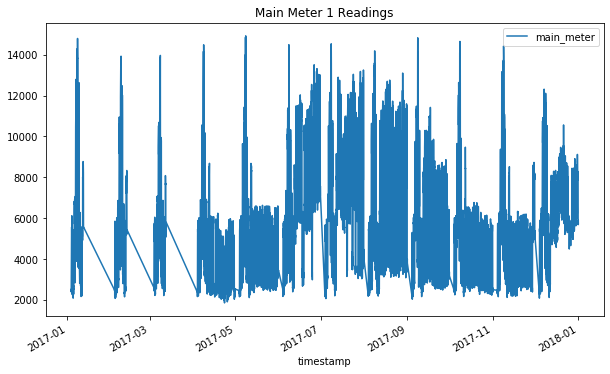

In [14]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

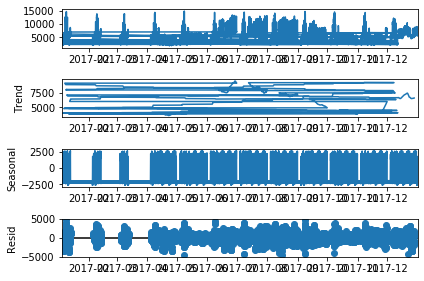

In [15]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [16]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=110773.421, BIC=110800.600, Fit time=0.792 seconds
Fit ARIMA: order=(0, 1, 0); AIC=111351.332, BIC=111364.921, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=110863.171, BIC=110883.555, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 1); AIC=110790.962, BIC=110811.346, Fit time=0.031 seconds
Fit ARIMA: order=(2, 1, 1); AIC=110188.539, BIC=110222.513, Fit time=2.046 seconds
Fit ARIMA: order=(2, 1, 0); AIC=110813.216, BIC=110840.395, Fit time=0.050 seconds
Fit ARIMA: order=(2, 1, 2); AIC=110179.076, BIC=110219.844, Fit time=3.510 seconds
Fit ARIMA: order=(3, 1, 3); AIC=109743.628, BIC=109797.985, Fit time=4.398 seconds
Fit ARIMA: order=(2, 1, 3); AIC=110233.032, BIC=110280.595, Fit time=3.981 seconds
Fit ARIMA: order=(4, 1, 3); AIC=109757.773, BIC=109818.925, Fit time=6.952 seconds
Fit ARIMA: order=(3, 1, 2); AIC=110150.582, BIC=110198.144, Fit time=3.975 seconds
Fit ARIMA: order=(3, 1, 4); AIC=108814.425, BIC=108875.577, Fit time=21.721 seconds
Fit

In [17]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 1, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [18]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([6105.67097462, 6051.3286777 , 6129.57396167, ..., 9065.47857811,
       8984.4371146 , 8937.76452209])

In [19]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb3m1.csv')

# add the code to show actual vs predicted
